In [94]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [61]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11208 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11208 non-null  int64  
 1   name         11208 non-null  object 
 2   nationality  11208 non-null  object 
 3   sex          11208 non-null  object 
 4   dob          11208 non-null  object 
 5   height       11208 non-null  float64
 6   weight       11208 non-null  float64
 7   sport        11208 non-null  object 
 8   gold         11208 non-null  int64  
 9   silver       11208 non-null  int64  
 10  bronze       11208 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [62]:
data.drop(data[(data['height'].isna()) | (data['dob'].isna())].index, inplace=True)

In [63]:
data[data['weight'].isna()]['weight'].median()
woman_weight = data[data['sex'] == 'female']['weight'].median()
man_weight = data[data['sex'] == 'male']['weight'].median()

data.loc[data['sex'] == 'female', ['weight']] = woman_weight
data.loc[data['sex'] == 'male', ['weight']] = man_weight

In [64]:
data['sport'].value_counts()
df = data[['dob', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze', 'sex']]
df.head()
df['age'] = df['dob'].apply(lambda x: 122-int(str(x[-2:])))
del df['dob']

<ipython-input-64-30e1e961734b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['dob'].apply(lambda x: 122-int(str(x[-2:])))


In [65]:
df.head()

,height,weight,sport,gold,silver,bronze,sex,age
0,1.72,78.0,athletics,0,0,0,male,53
1,1.68,61.0,fencing,0,0,0,female,36
2,1.98,78.0,athletics,0,0,1,male,30
3,1.83,78.0,taekwondo,0,0,0,male,31
4,1.81,78.0,cycling,0,0,0,male,32


In [66]:
le = LabelEncoder()
le.fit( df['sex'])
Y = pd.Series (data = le.transform(df['sex']))
Y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [67]:
le = LabelEncoder()
le.fit( df['sport'])
df['sport_code'] = le.transform(df['sport'])
del df['sport']
del df['sex']
X = df
X

<ipython-input-67-5aa85042a2c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sport_code'] = le.transform(df['sport'])


,height,weight,gold,silver,bronze,age,sport_code
0,1.72,78.0,0,0,0,53,2
1,1.68,61.0,0,0,0,36,9
2,1.98,78.0,0,0,1,30,2
3,1.83,78.0,0,0,0,31,22
4,1.81,78.0,0,0,0,32,7
...,...,...,...,...,...,...,...
11533,1.64,61.0,0,0,0,27,2
11534,1.73,61.0,0,0,0,36,2
11535,1.85,78.0,0,0,0,31,27
11536,1.60,78.0,0,0,0,33,26


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [95]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [75]:
model = LogisticRegression()

In [96]:
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [97]:
predictions = model.predict_proba(X_test)
predictions

array([[4.85233966e-04, 9.99514766e-01],
       [5.03641924e-04, 9.99496358e-01],
       [9.99526597e-01, 4.73402808e-04],
       ...,
       [3.85610181e-04, 9.99614390e-01],
       [9.99299276e-01, 7.00724164e-04],
       [1.10941692e-03, 9.98890583e-01]])

In [98]:
model.score(X_train, Y_train)

1.0

In [99]:
model.score(X_test, Y_test)

1.0

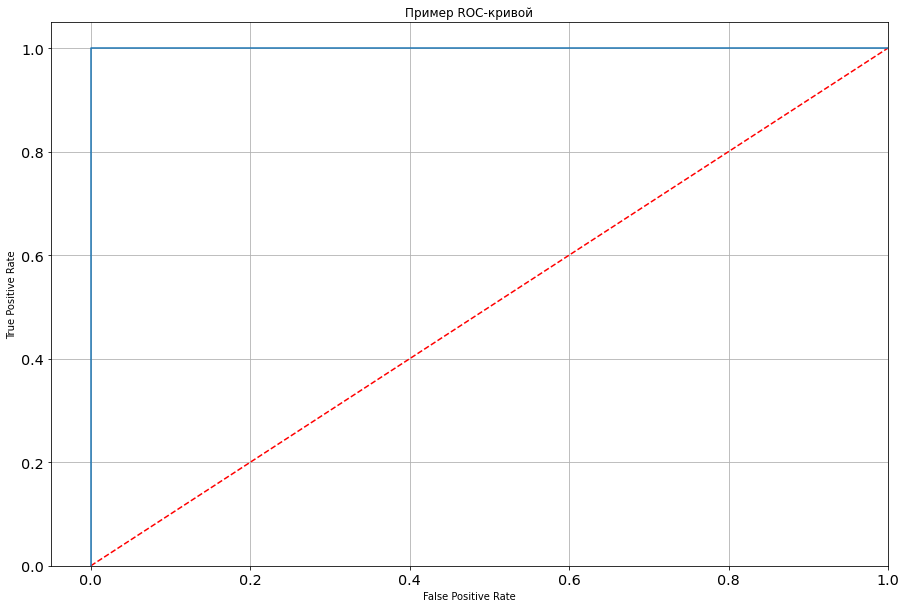

In [121]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')

plt.rcParams.update(params)
plt.plot(fpr, tpr)
plt.grid()

In [101]:
roc_auc_score( Y_test, predictions[:, 1] )

1.0

вывод: модель обучилась идеально

In [88]:
# считаем метрики вручную:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [89]:
TPR = tp/(tp+fn)
TPR

1.0

In [90]:
FPR = fp/(fp+tn)
FPR

0.0

считаем вручную  метрики для построения roc и pr:

In [124]:
# считаем метрики вручную:

tpr = [] # recall
fpr = [] 
precision = []

threshold = 0
while threshold <= 1:
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    tpr.append(tp/(tp+fn)) 
    fpr.append(fp/(fp+tn))
    precision.append((tp/(tp+fp)))
    threshold += 0.05
tpr, fpr, precision

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.5316681534344335,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0])

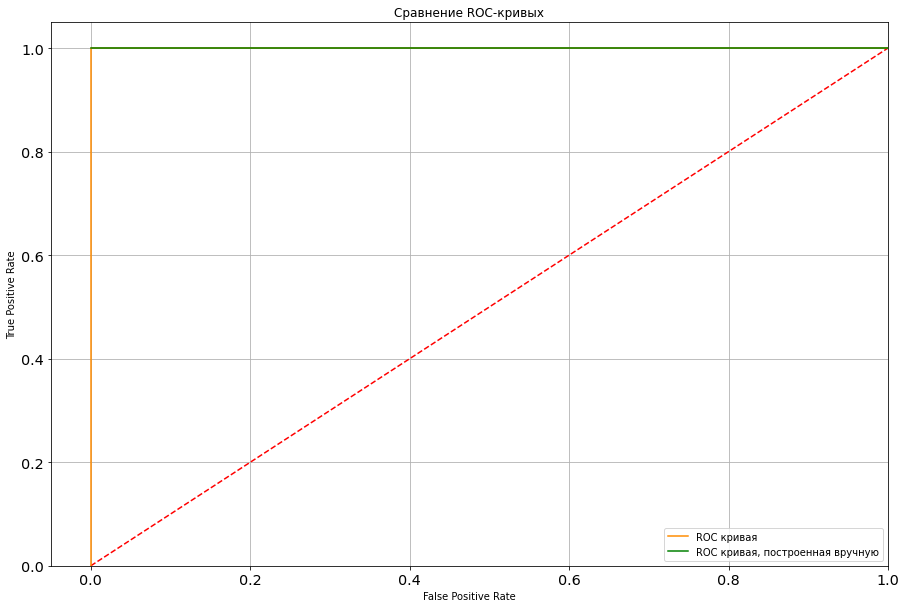

In [136]:
fpr_, tpr_, thres = roc_curve(Y_test, predictions[:, 1])

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых')

plt.rcParams.update(params)
plt.plot(fpr_, tpr_, color='darkorange', label = 'ROC кривая')
plt.plot(fpr, tpr, color='green', label = 'ROC кривая, построенная вручную')
plt.legend(loc="lower right")
plt.grid()

Графики кривых ROC, построенные вручную и автоматически, совпали, значит, рассчеты верны.

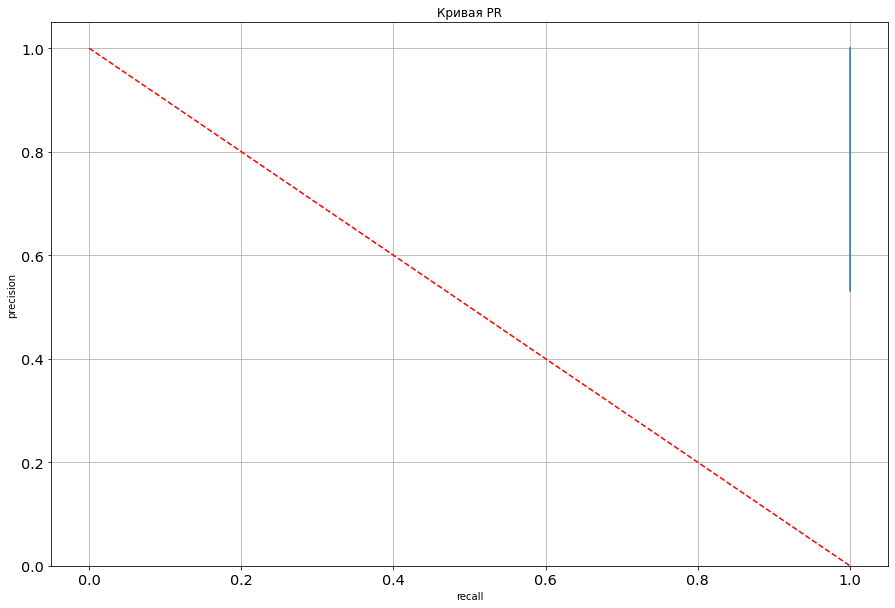

In [138]:
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot([0, 1], [1, 0], color='red', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Кривая PR')

plt.rcParams.update(params)
plt.plot(tpr, precision)
plt.grid()

Исходя из построенных кривых и посчитанных метрик, наша модель обучилась идеально. Кривые ROC и PR лежат значительно выше соответствующих диагоналей, следовательно качество обучение очень хорошее. Если кривая ROC лежит ниже диагонали, то тогда наша модель будет показывает качество классификации на уровне или ниже случайного предсказания.